In [1]:
import os

os.chdir("..")

import numpy as np
import scipy.constants as con
import matplotlib.pyplot as plt
import BayesianGit.BayesianOptimiser2.BOPackage as BOPackage

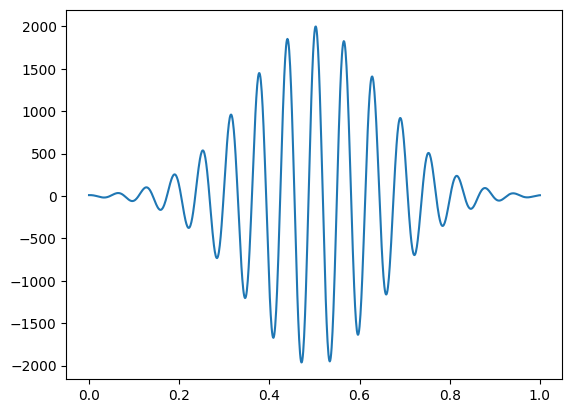

In [2]:
"""
Define the objective function.
"""

def ObjectiveFunction(x):
    x_centre = 0.5
    FWHM = 0.3
    width = FWHM / (2 * np.log(2))

    spatial_intensity =  np.exp(- ((x - x_centre) / width)**2)

    return 2000 * np.cos(100 * x) * spatial_intensity

X = np.linspace(0, 1, 1001, endpoint=True)

plt.plot(X, ObjectiveFunction(X))

In [3]:
"""
Configure the optimiser.
"""
Kernel = BOPackage.RBF_Kernel
length_scale = 0.04

AcquisitionFunction = BOPackage.UCB
max_kappa = 10
min_kappa = 0.1

bounds = np.array([[0, 1]])
n_samples = 10

log_path = '/work4/clf/david/Bayesian/Outputs/BO_Test_log_1'

# Create the object
bo = BOPackage.BO(KernelFunction=BOPackage.RBF_Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=BOPackage.UCB, 
                  bounds=bounds, 
                  n_samples=n_samples,
                  #log_path=log_path,
                  random_seed=23)

In [4]:
"""
Get first random batch and update the optimiser.
"""

raw_X = bo.GetRandomXBatch(batch_size=4)
raw_Y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_Y)

bo.X_data, bo.y_data

(array([[0.51729788],
        [0.9469626 ],
        [0.76545976],
        [0.28239584]]),
 array([[ 211.2245851 ],
        [  25.301659  ],
        [ 182.33776843],
        [-727.18317143]]))

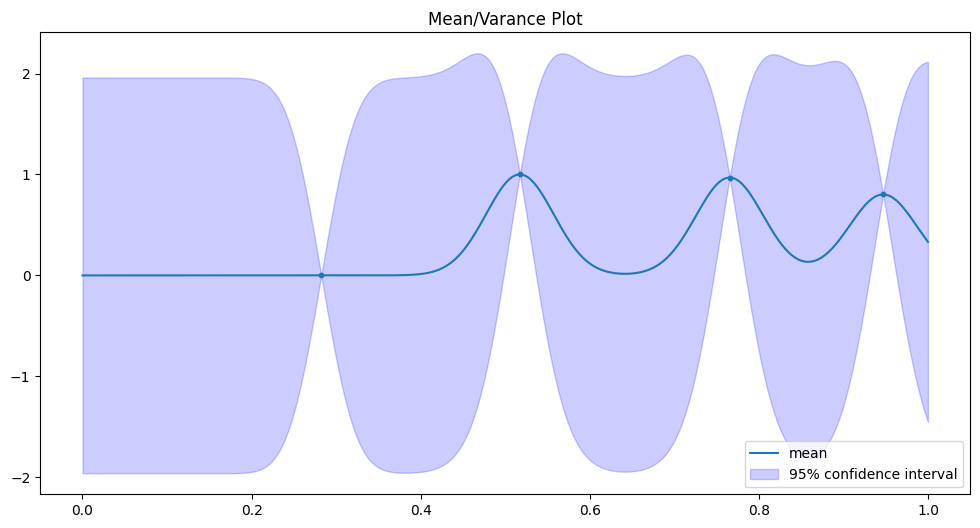

In [5]:
"""
Take a look at the mean and variance of the function now we have some data
"""

BOPackage.SausagePlot(bo)

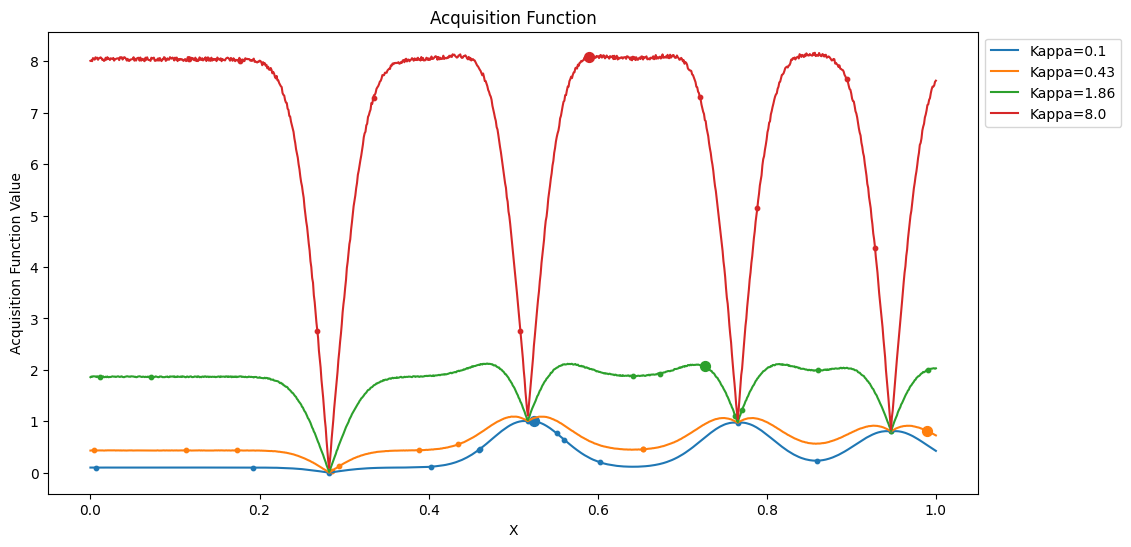

In [6]:
"""
Plot the Acquisition function for a range of kappas and demonstrate how the next point is selected.

'n_sample' random X values are selected and the one which returns the largest acqusition function value
is chosen for each kappa value. Assuming no 'sub batches' are used, there will be 'batch_size' kappa 
values and a point in X will be selected for each kappa value.
"""

BOPackage.KappaAcquisitionFunctionPlot(bo, number_kappas=4, number_candidate_points=10, max_kappa=8, min_kappa=0.1)

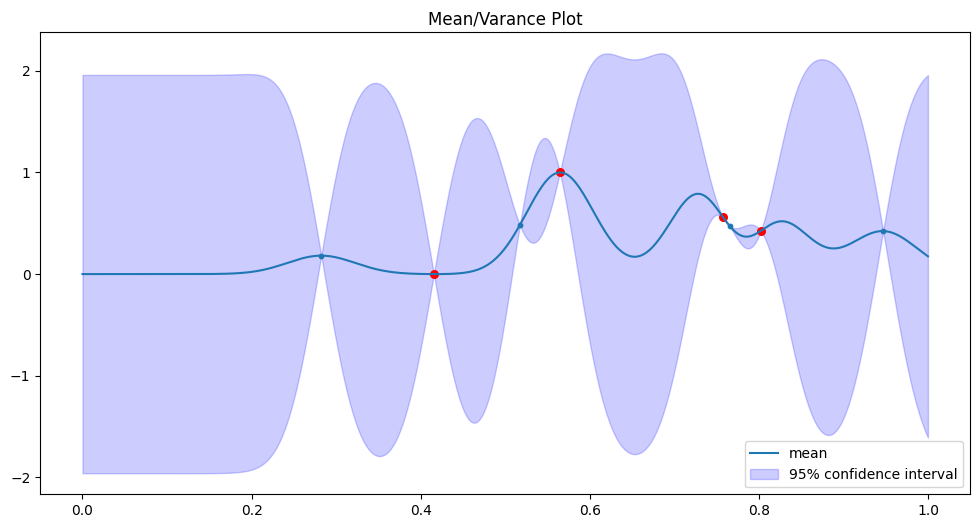

In [7]:
"""
Now select the next batch of X values using the acquisition function (not random) and update the optimiser.
"""

batch_size = 4
raw_X = bo.GetNextXBatch(batch_size=batch_size, max_kappa=max_kappa, min_kappa=min_kappa)
raw_Y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_Y)

BOPackage.SausagePlot(bo, highlight_recent=batch_size)

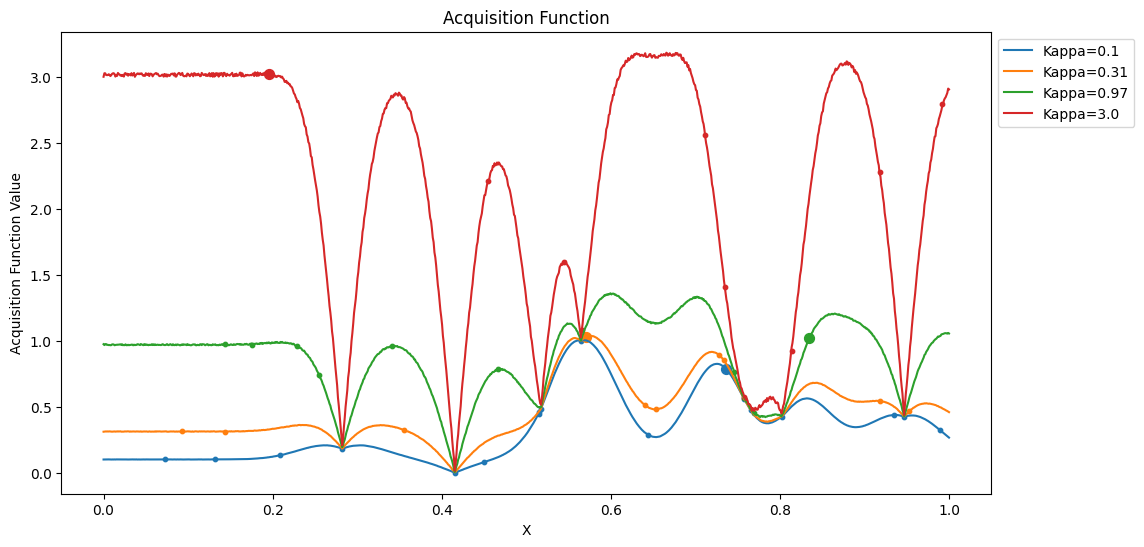

In [8]:
"""
Again lets looks at the acquisition function and how our next X set is selected.
"""
BOPackage.KappaAcquisitionFunctionPlot(bo, number_kappas=4, number_candidate_points=10, max_kappa=3, min_kappa=0.1)

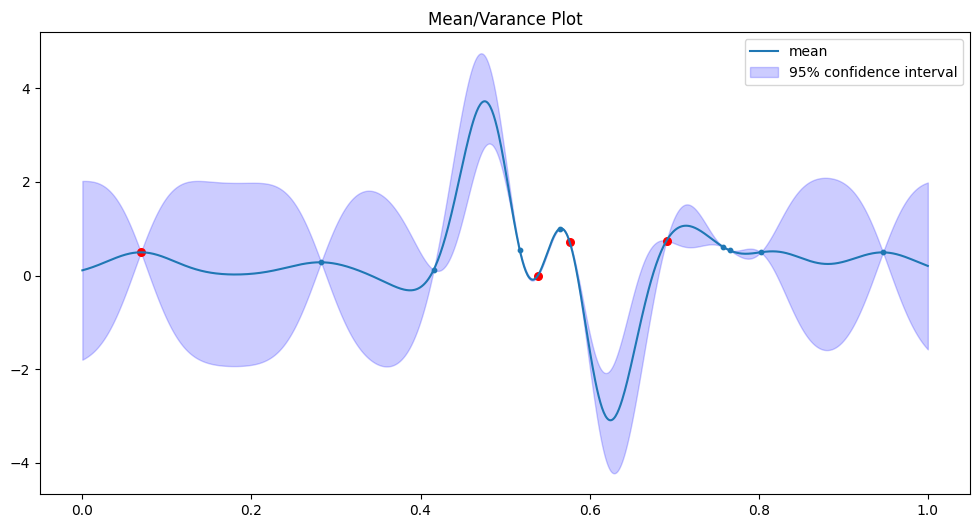

In [9]:
"""
Final example of doing this again.
"""
batch_size = 4

raw_X = bo.GetNextXBatch(batch_size=4, max_kappa=max_kappa, min_kappa=min_kappa)
raw_Y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_Y)

BOPackage.SausagePlot(bo, highlight_recent=batch_size)

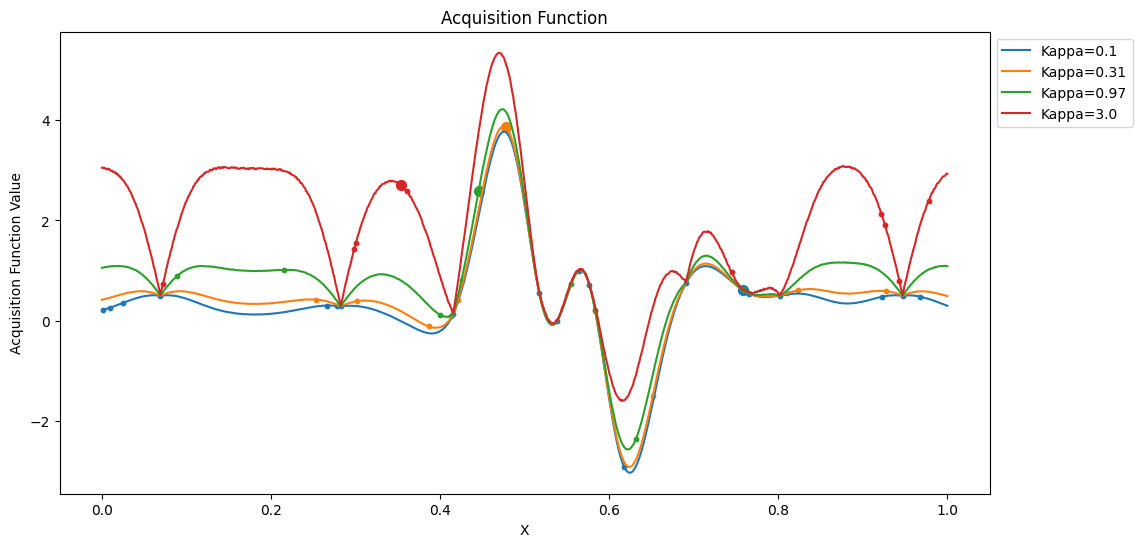

In [10]:
BOPackage.KappaAcquisitionFunctionPlot(bo, number_kappas=4, number_candidate_points=10, max_kappa=3, min_kappa=0.1)

In [11]:
"""
Can save the object for use later
"""

# BOPackage.SaveOptimisaer(bo, '/Users/jordanlee/Projects/SummerProject/Bayesian/BayesianOptimiser2/BO.pkl')

'\nCan save the object for use later\n'

In [12]:
"""
Can reload the object and continue as before.
"""

# bo2 = BOPackage.LoadOptimiser('/Users/jordanlee/Projects/SummerProject/Bayesian/BayesianOptimiser2/BO.pkl')
# BOPackage.SausagePlot(bo2)

'\nCan reload the object and continue as before.\n'

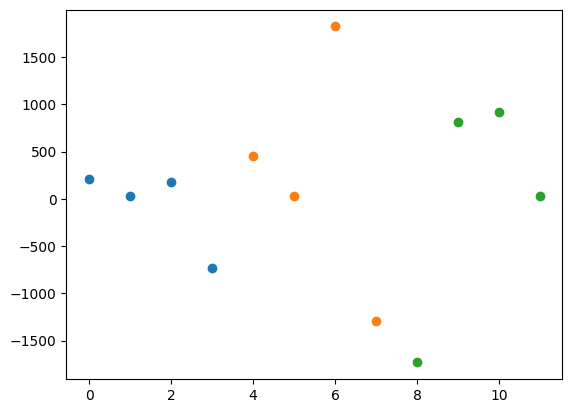

In [13]:
BOPackage.PlotData(bo)